In [67]:
import pandas as pd
import numpy as np

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [70]:
df=pd.read_csv('C:\\Users\\Pratik2020\\Downloads\\Usecase1_Dataset.csv')

In [71]:
df.describe(include='all')

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
count,11746.000000,1.174600e+04,11746,11746,11746,11735,11746,11746,11746,11746,...,11746,11746,11628,11716,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483
unique,NaN,NaN,11740,102,103,11580,11582,11508,11645,177,...,2920,3537,2,1,NaN,NaN,NaN,NaN,NaN,144
top,NaN,NaN,Club Quarters Hotel,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1019730001,1019730001,Not Available,410 West 118th Street,Not Available,...,Not Available,05/01/2017 02:58:14 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,Midtown-Midtown South ...
freq,NaN,NaN,2,11324,11324,26,26,162,12,11539,...,163,1258,7552,11716,NaN,NaN,NaN,NaN,NaN,720
mean,7185.759578,3.642958e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.754379,-73.957057,7.140673,15.771275,4977.596647,NaN
std,4323.859984,1.049070e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.080120,0.046337,3.954129,15.674375,13520.422990,NaN
min,1.000000,7.365000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.516065,-74.243582,1.000000,1.000000,1.000000,NaN
25%,3428.250000,2.747222e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.707226,-73.984662,4.000000,4.000000,100.000000,NaN
50%,6986.500000,3.236404e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.759130,-73.962810,7.000000,9.000000,201.000000,NaN
75%,11054.500000,4.409092e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.817623,-73.932443,9.000000,33.000000,531.500000,NaN


## There are NaN values present in the dataset we need impute/remove them

In [72]:
#df.isna().sum().to_frame().sort_values(by=[0],ascending=False)
df_nan = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing n':df.isnull().sum(),'% Missing' :df_nan})
missing_data.sort_values('% Missing', ascending=False).head(45)

,Missing n,% Missing
NTA,2263,19.266133
Longitude,2263,19.266133
Census Tract,2263,19.266133
Council District,2263,19.266133
Community Board,2263,19.266133
Latitude,2263,19.266133
Street Number,124,1.055679
Street Name,122,1.038651
Water Required?,118,1.004597
Borough,118,1.004597


### There are 6 Columns have 20% Nan values each,also need to check if column has null field with another name

In [73]:
df['ENERGY STAR Score'].value_counts()

Not Available    2104
100               649
1                 299
99                162
80                144
                 ... 
17                 48
12                 47
42                 47
21                 46
11                 44
Name: ENERGY STAR Score, Length: 101, dtype: int64

## Columns containg Not Available record

In [74]:
df.columns[df.isin(['Not Available']).any()] 

Index(['NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 2',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site

## There are Not Available records ,replacing them with np.nan

In [75]:
df.replace('Not Available',np.nan,inplace=True)

## Validating Nan records after replacing Not available with np.nan

In [76]:
df_nan = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing n':df.isnull().sum(),'% Missing' :df_nan})
missing_data.sort_values('% Missing', ascending=False).head(45)

,Missing n,% Missing
Fuel Oil #1 Use (kBtu),11737,99.923378
Diesel #2 Use (kBtu),11730,99.863783
Address 2,11539,98.237698
Fuel Oil #5 & 6 Use (kBtu),11152,94.942959
District Steam Use (kBtu),10810,92.031330
Fuel Oil #4 Use (kBtu),10425,88.753618
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.365912
3rd Largest Property Use Type,10262,87.365912
Fuel Oil #2 Use (kBtu),9165,78.026562
2nd Largest Property Use - Gross Floor Area (ft²),8005,68.150860


##  Nan values significantly increased after replacing Not Available with np.nan

In [77]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

## EDA

<AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Density'>

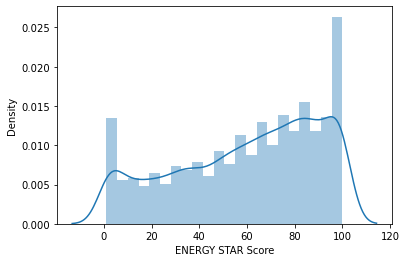

In [78]:
sns.distplot(df['ENERGY STAR Score'])

## 650 buildings have 100 Energy start score and 65 is median score

Text(0, 0.5, 'Count of building')

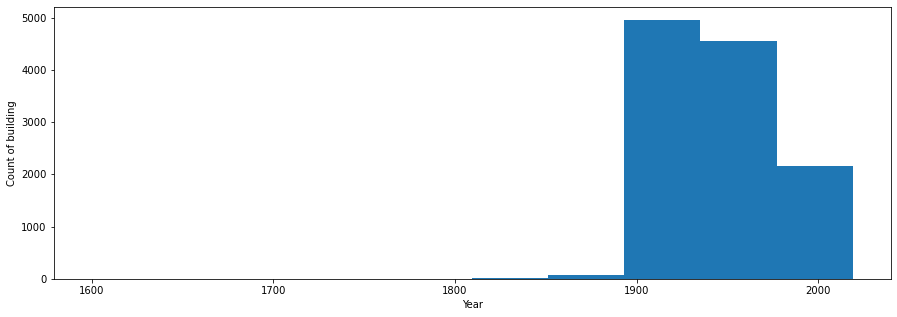

In [79]:
plt.figure(figsize=(15,5))
plt.hist(df['Year Built'], bins = 10)
plt.xlabel('Year')
plt.ylabel('Count of building')

## From above histogram we can conclude that more buildings are built between 1900-2000

Text(0, 0.5, 'No of buildings')

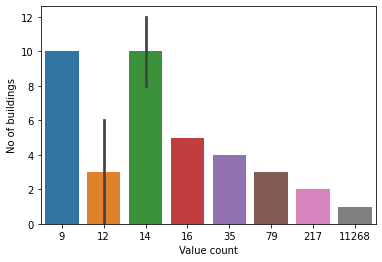

In [80]:
sns.barplot(x=df['Number of Buildings - Self-reported'].value_counts().head(10).values,y=df['Number of Buildings - Self-reported'].value_counts().head(10).index)
plt.xlabel('Value count')
plt.ylabel('No of buildings')

## From above graph we can infer that  more than 90% people have one building

In [81]:
df['Property GFA - Self-Reported (ft²)']

0         762051
1        3889181
2         231342
3        1305748
4         179694
          ...   
11741      74177
11742     101291
11743     103328
11744      60715
11745      63756
Name: Property GFA - Self-Reported (ft²), Length: 11746, dtype: int64

In [82]:
df['Property GFA - Self-Reported (ft²)'].describe()

count    1.174600e+04
mean     1.673739e+05
std      3.189238e+05
min      0.000000e+00
25%      6.699400e+04
50%      9.408000e+04
75%      1.584140e+05
max      1.421712e+07
Name: Property GFA - Self-Reported (ft²), dtype: float64

## 167373 ft2 is mean property GFA

In [83]:
df['DOF Gross Floor Area'].describe()

count    1.162800e+04
mean     1.732695e+05
std      3.367055e+05
min      5.002800e+04
25%      6.524000e+04
50%      9.313850e+04
75%      1.596140e+05
max      1.354011e+07
Name: DOF Gross Floor Area, dtype: float64

## Mean of 'DOF Gross Floor Area' > mean of 'Property GFA - Self-Reported (ft²)'

In [84]:
df['Occupancy'].value_counts()

100    10885
95       391
90       206
80        66
85        49
0         34
75        31
70        21
50        13
40        12
60        10
65         7
25         5
30         5
10         4
5          4
45         1
55         1
20         1
Name: Occupancy, dtype: int64

## If we see Occupancy column the values in that column are in multiple of 5 and 90% property has 100 occupancy 

In [85]:
df['Site EUI (kBtu/ft²)'].fillna(0)

0        305.6
1        229.8
2            0
3            0
4            0
         ...  
11741     81.4
11742    109.3
11743     44.3
11744       70
11745    130.2
Name: Site EUI (kBtu/ft²), Length: 11746, dtype: object

In [86]:
df['Site EUI (kBtu/ft²)'].fillna(0).astype('float').describe()

count     11746.000000
mean        276.184914
std        8547.306727
min           0.000000
25%          60.900000
50%          78.000000
75%          97.200000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [87]:
df['Source EUI (kBtu/ft²)'].fillna(0).astype('float').describe()

count     11746.000000
mean        380.552758
std        9247.998417
min           0.000000
25%          98.100000
50%         124.200000
75%         161.775000
max      912801.100000
Name: Source EUI (kBtu/ft²), dtype: float64

## From above we can conclude that mean for 'Source EUI (kBtu/ft²)' is more than 'Site EUI (kBtu/ft²)'

Text(0, 0.5, 'Largest Property ')

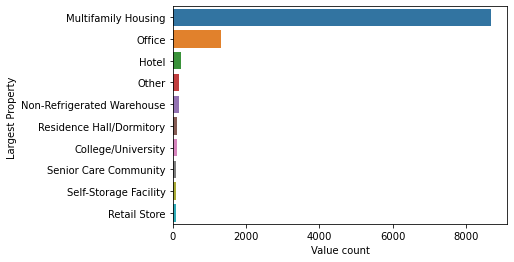

In [88]:
sns.barplot(x=df['Primary Property Type - Self Selected'].value_counts().head(10).values,y=df['Primary Property Type - Self Selected'].value_counts().head(10).index)
plt.xlabel('Value count')
plt.ylabel('Largest Property ')

## Most of the self selected primary property types are multifamily hosuing and office

Text(0, 0.5, 'Largest Property ')

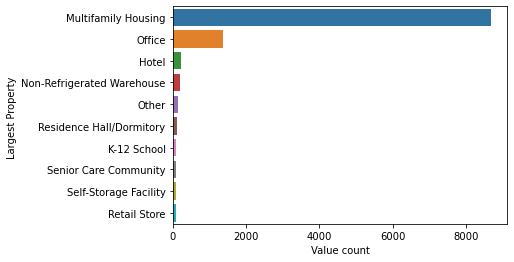

In [89]:
sns.barplot(x=df['Largest Property Use Type'].value_counts().head(10).values,y=df['Largest Property Use Type'].value_counts().head(10).index)
plt.xlabel('Value count')
plt.ylabel('Largest Property ')

## Multifamily housing and Office are largest proprty types

Text(0, 0.5, '2nd Largest Property ')

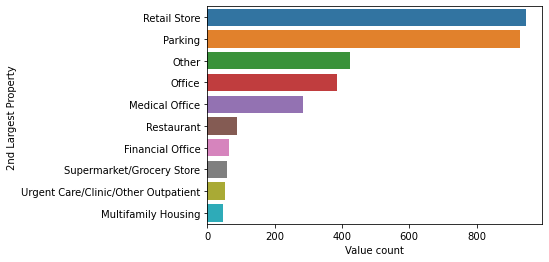

In [90]:
sns.barplot(x=df['2nd Largest Property Use Type'].value_counts().head(10).values,y=df['2nd Largest Property Use Type'].value_counts().head(10).index)
plt.xlabel('Value count')
plt.ylabel('2nd Largest Property ')

## Retail store and parking are 2nd largest property types

Text(0, 0.5, '3rd Largest Property ')

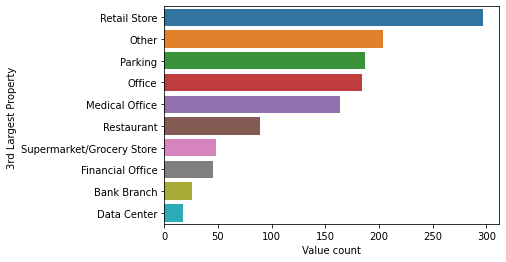

In [91]:
sns.barplot(x=df['3rd Largest Property Use Type'].value_counts().head(10).values,y=df['3rd Largest Property Use Type'].value_counts().head(10).index)
plt.xlabel('Value count')
plt.ylabel('3rd Largest Property ')

## Retail store and other are 3rd largest property types

Text(0.5, 0, 'Borough')

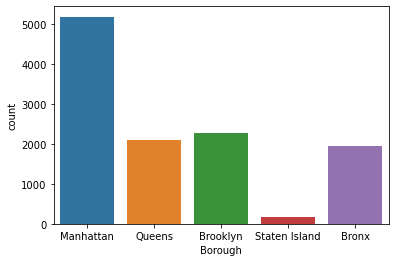

In [92]:
sns.countplot(x=df['Borough'])
plt.xlabel('Borough')

## Most of the properties belong to Manhattan followed by Brooklyn

In [93]:
df['Total GHG Emissions (Metric Tons CO2e)'].astype('float').describe()

count    1.167200e+04
mean     4.553657e+03
std      2.041639e+05
min      0.000000e+00
25%      3.287000e+02
50%      5.002500e+02
75%      9.084250e+02
max      2.094340e+07
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

In [94]:
df['Weather Normalized Site EUI (kBtu/ft²)'].astype('float').describe()

count     10281.000000
mean        309.747466
std        9784.731207
min           0.000000
25%          65.100000
50%          82.500000
75%         102.500000
max      939329.000000
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64

In [95]:
df['Weather Normalized Site Electricity Intensity (kWh/ft²)'].astype('float').describe()

count    10959.000000
mean        11.072643
std        127.733868
min          0.000000
25%          3.800000
50%          5.300000
75%          9.200000
max       6259.400000
Name: Weather Normalized Site Electricity Intensity (kWh/ft²), dtype: float64

<AxesSubplot:ylabel='Density'>

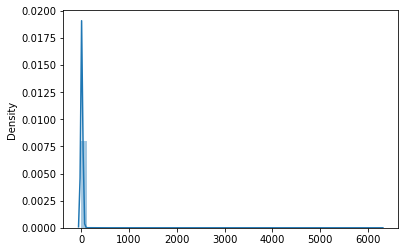

In [96]:
sns.distplot(x=df['Weather Normalized Site Electricity Intensity (kWh/ft²)'].astype('float'))

In [97]:
df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].astype('float').describe()

count    9783.000000
mean        1.901441
std        97.204587
min         0.000000
25%         0.100000
50%         0.500000
75%         0.700000
max      9393.000000
Name: Weather Normalized Site Natural Gas Intensity (therms/ft²), dtype: float64

<AxesSubplot:ylabel='Density'>

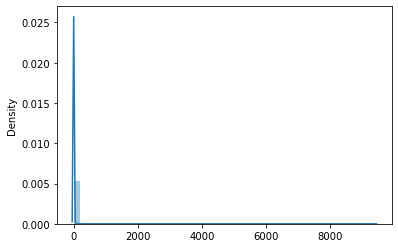

In [98]:
sns.distplot(x=df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].astype('float'))

In [99]:
df['Weather Normalized Source EUI (kBtu/ft²)'].astype('float').describe()

count     10281.000000
mean        417.915709
std       10530.524339
min           0.000000
25%         103.500000
50%         129.400000
75%         167.200000
max      986366.000000
Name: Weather Normalized Source EUI (kBtu/ft²), dtype: float64

## Mean for weather Normalized source EUI > mean for weather Normalized site EUI

<AxesSubplot:xlabel='Water Required?', ylabel='count'>

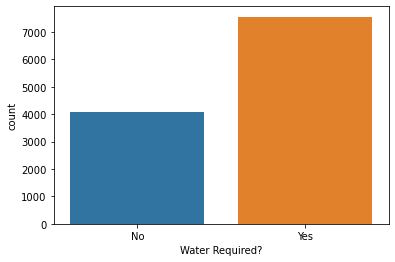

In [100]:
sns.countplot(x=df['Water Required?'])

## Feature Enginnering -


## Few columns in the dataset should be numeric but they were object type due to Not Available record,now changing their data type to float

In [101]:
numeric_terms=['ft²','kBtu','(therms)','(kWh)','(Metric Tons CO2e)','(kgal)']
for col in list(df.columns):
    for term in numeric_terms:
        if (term in col):
            df[col] = df[col].astype(float)

In [102]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

In [103]:
df['ENERGY STAR Score'].isna().sum()

2104

In [104]:
df.dropna(subset=['ENERGY STAR Score'],axis=0,inplace=True)

In [105]:
df.shape

(9642, 60)

In [106]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

## In Dataset there are 3 columns - Largest property use type - Gross Floor Area,2nd Largest Property usee - Gross Floor Area (ft²) and '3rd Largest Property Use Type - Gross Floor Area (ft²)'. GFA is total area including construction(walls).We can add and Create one column 'Total Property Use - Gross Floor Area (ft²)' 

In [107]:
df['Largest Property Use Type - Gross Floor Area (ft²)'].fillna(0,inplace=True)
df['2nd Largest Property Use - Gross Floor Area (ft²)'].fillna(0,inplace=True)
df['3rd Largest Property Use Type - Gross Floor Area (ft²)'].fillna(0,inplace=True)

In [108]:
df['Total Property Use - Gross Floor Area (ft²)']=df['Largest Property Use Type - Gross Floor Area (ft²)'] +df['2nd Largest Property Use - Gross Floor Area (ft²)']+df['3rd Largest Property Use Type - Gross Floor Area (ft²)']

In [109]:
df['Total Property Use - Gross Floor Area (ft²)']

1        3889181.0
5        2971874.0
12        451303.0
13        212656.0
14        567517.0
           ...    
11741      74177.0
11742     101291.0
11743     103328.0
11744      60715.0
11745      63756.0
Name: Total Property Use - Gross Floor Area (ft²), Length: 9642, dtype: float64

In [110]:
df['Property GFA - Self-Reported (ft²)']

1        3889181.0
5        2971874.0
12        432503.0
13        172656.0
14        567517.0
           ...    
11741      74177.0
11742     101291.0
11743     103328.0
11744      60715.0
11745      63756.0
Name: Property GFA - Self-Reported (ft²), Length: 9642, dtype: float64

## Column 'Property GFA - Self-Reported (ft²)' is as same as Column 'Total Property Use - Gross Floor Area (ft²)' so dropping 4 columns (Total Property Use - Gross Floor Area (ft²),'Largest Property Use Type - Gross Floor Area (ft²)',2nd Largest Property Use - Gross Floor Area (ft²),'3rd Largest Property Use Type - Gross Floor Area (ft²)'

In [111]:
df.drop(['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)','Total Property Use - Gross Floor Area (ft²)'],inplace=True,axis=1)

## Column 'List of All Property Use Types at Property' contains all the property records so keeping it and dropping 'Largest Property Use Type', '2nd Largest Property Use Type','3rd Largest Property Use Type' columns 

In [112]:
df.drop(['Largest Property Use Type', '2nd Largest Property Use Type',
       '3rd Largest Property Use Type'],inplace=True,axis=1)

In [113]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel

## Dropping columns 'Address 1 (self-reported)', 'Street Number', 'Street Name', 'Borough','Latitude', 'Longitude' as we have postal code column which can represent location

In [114]:
df.drop(columns={'Address 1 (self-reported)','Street Number', 'Street Name', 'Borough','Latitude', 'Longitude','Address 2'},inplace=True)

In [115]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Postal Code',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weath

## If we add columns 'Direct GHG Emissions (Metric Tons CO2e)' and 'Indirect GHG Emissions (Metric Tons CO2e)' we get 'Total GHG Emissions (Metric Tons CO2e)'.Keeping 'Total GHG Emissions (Metric Tons CO2e)' and droping other two

In [116]:
df['Direct GHG Emissions (Metric Tons CO2e)']+df['Indirect GHG Emissions (Metric Tons CO2e)']

1        55870.5
5        54429.8
12        1194.0
13        2846.9
14       13302.6
          ...   
11741      354.7
11742      674.7
11743      355.2
11744      247.9
11745      471.4
Length: 9642, dtype: float64

In [117]:
df['Total GHG Emissions (Metric Tons CO2e)']

1        55870.4
5        54429.8
12        1194.0
13        2846.8
14       13302.6
          ...   
11741      354.7
11742      674.6
11743      355.2
11744      247.8
11745      471.3
Name: Total GHG Emissions (Metric Tons CO2e), Length: 9642, dtype: float64

In [118]:
df.drop(['Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)'],axis=1,inplace=True)

In [119]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Postal Code',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weath

## We have column 'List of All Property Use Types at Property' which contains all property recoreds so we can drop 'Primary Property Type - Self Selected' , 'Number of Buildings - Self-reported', 'Occupancy' columns

In [120]:
df.drop(['Primary Property Type - Self Selected','Number of Buildings - Self-reported', 'Occupancy'],axis=1,inplace=True)

In [121]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Postal Code',
       'DOF Gross Floor Area', 'List of All Property Use Types at Property',
       'Year Built', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
     

In [122]:
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Postal Code,DOF Gross Floor Area,...,Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract,NTA
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,10032,3693539.0,...,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,12.0,10.0,251.0,Washington Heights South ...
5,6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1014800001,1-01480-0001,1084781; 1084780,10021,2230742.0,...,NaN,NaN,414.2,04/27/2017 11:23:27 AM,No,In Compliance,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,11201,NaN,...,22061.0,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,11201,212656.0,...,NaN,NaN,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
14,17,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,5033550032;5033550065,5033550032;5-03355-0065,5049717;5104756,10305,NaN,...,9574.0,16.87,599.5,04/25/2017 12:11:30 PM,No,In Compliance,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Advanced: 24 Monroe Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002380026,3-00238-0026\t,3001927,11218,70645.0,...,2308.5,31.12,109.6,04/26/2017 11:20:06 AM,NaN,NaN,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
11742,14989,4940416,Advanced: 150 Joralemon St / 124 Clinton St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002640017,3-00264-0017\t,3002539,11201,93500.0,...,4216.8,41.63,153.4,04/26/2017 11:20:06 AM,NaN,NaN,2.0,33.0,7.0,Brooklyn Heights-Cobble Hill ...
11743,14990,4628296,(9267) - 267 Sixth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3009870001​,3-00987-0001​,3413788; 3021326,11215,NaN,...,NaN,NaN,103.6,03/23/2017 02:51:02 PM,NaN,NaN,NaN,NaN,NaN,NaN
11744,14991,4940464,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,11215,57824.0,...,1687.6,27.80,92.7,04/26/2017 11:20:06 AM,NaN,NaN,6.0,39.0,165.0,Park Slope-Gowanus ...


## 'NYC Borough, Block and Lot (BBL) self-reported' is equal to 'BBL - 10 digits', where the first digit represents the 'Borough', next five digits 'Tax Block' and last four 'Tax Lot', plus we have already a 'Borough' column in the dataset.  There are only two missing values at 'BBL - 10 digits'.

In [123]:
df['BBL - 10 digits'] = df['BBL - 10 digits'].str.extract('(\d+)', expand=False)
df['Borough'] = df['BBL - 10 digits'].str[0]
df['Tax Block'] = df['BBL - 10 digits'].str[1:6]
df['Tax Lot'] = df['BBL - 10 digits'].str[6:10]
df['Postal Code'] = df['Postal Code'].astype(str)
df['Year Built'] = df['Year Built'].astype(str)
df['Borough'] = df['Borough'].astype(str)
df['Tax Block'] = df['Tax Block'].astype(str)
df['Tax Lot'] = df['Tax Lot'].astype(str)
df['Property Id'] = df['Property Id'].astype(str)

In [124]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Postal Code',
       'DOF Gross Floor Area', 'List of All Property Use Types at Property',
       'Year Built', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
     

## Site EUI is the amount of heat and electricity a buildings consumes as reflected in utility bills.Dropping kBtu columns as they are being used to calculate Site EUI

In [125]:
df['Fuel Oil #1 Use (kBtu)']+df['Fuel Oil #2 Use (kBtu)']+df['Fuel Oil #4 Use (kBtu)']+df['Fuel Oil #5 & 6 Use (kBtu)']+df['Diesel #2 Use (kBtu)']
+df['District Steam Use (kBtu)']+df['Natural Gas Use (kBtu)']+df['Electricity Use - Grid Purchase (kBtu)']/df['Property GFA - Self-Reported (ft²)']
            
                                                                                                                          

1        5.416587e+08
5        9.631712e+08
12                NaN
13                NaN
14                NaN
             ...     
11741             NaN
11742             NaN
11743             NaN
11744             NaN
11745             NaN
Length: 9642, dtype: float64

In [126]:
df.drop(['Fuel Oil #1 Use (kBtu)',                                         
            'Fuel Oil #2 Use (kBtu)',                                         
            'Fuel Oil #4 Use (kBtu)',                                         
            'Fuel Oil #5 & 6 Use (kBtu)',                                     
            'Diesel #2 Use (kBtu)',                                           
            'District Steam Use (kBtu)',                                      
            'Natural Gas Use (kBtu)',
            'Electricity Use - Grid Purchase (kBtu)'],axis=1,inplace=True)

In [127]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Postal Code',
       'DOF Gross Floor Area', 'List of All Property Use Types at Property',
       'Year Built', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Sourc

In [128]:
df.isna().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                  2
NYC Borough, Block and Lot (BBL) self-reported                   2
NYC Building Identification Number (BIN)                       132
Postal Code                                                      0
DOF Gross Floor Area                                            63
List of All Property Use Types at Property                       0
Year Built                                                       0
Metered Areas (Energy)                                           4
Metered Areas  (Water)                                        3741
ENERGY STAR Score                                             

## Dropping Columns having nan values

In [129]:


df.drop(['Water Use (All Water Sources) (kgal)','Water Intensity (All Water Sources) (gal/ft²)','NYC Borough, Block and Lot (BBL) self-reported',
            'NYC Building Identification Number (BIN)',
            'BBL - 10 digits',
            'Parent Property Name',
            'Property Name','DOF Gross Floor Area','DOF Benchmarking Submission Status','Metered Areas (Energy)','Metered Areas  (Water)','Release Date','Water Required?','Community Board','Council District','Census Tract','NTA'],axis=1,inplace=True)



In [130]:
df.columns

Index(['Order', 'Property Id', 'Parent Property Id', 'Postal Code',
       'List of All Property Use Types at Property', 'Year Built',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)', 'Source EUI (kBtu/ft²)',
       'Borough', 'Tax Block', 'Tax Lot'],
      dtype='object')

In [131]:
df.isna().sum()

Order                                                            0
Property Id                                                      0
Parent Property Id                                               0
Postal Code                                                      0
List of All Property Use Types at Property                       0
Year Built                                                       0
ENERGY STAR Score                                                0
Site EUI (kBtu/ft²)                                              0
Weather Normalized Site EUI (kBtu/ft²)                        1098
Weather Normalized Site Electricity Intensity (kWh/ft²)        492
Weather Normalized Site Natural Gas Intensity (therms/ft²)    1413
Weather Normalized Source EUI (kBtu/ft²)                      1098
Weather Normalized Site Natural Gas Use (therms)              1413
Weather Normalized Site Electricity (kWh)                      492
Total GHG Emissions (Metric Tons CO2e)                        

## If we check columns having Nan values they are the ratios of two quantities and all columns have ft2 at denominaor .There is no nan value present for Property GFA - Self-Reported (ft²) column ...so columns have nan values are actually zero

In [132]:
df.fillna(0,inplace=True)

In [133]:
df.isna().sum()

Order                                                         0
Property Id                                                   0
Parent Property Id                                            0
Postal Code                                                   0
List of All Property Use Types at Property                    0
Year Built                                                    0
ENERGY STAR Score                                             0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site EUI (kBtu/ft²)                        0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0
Weather Normalized Source EUI (kBtu/ft²)                      0
Weather Normalized Site Natural Gas Use (therms)              0
Weather Normalized Site Electricity (kWh)                     0
Total GHG Emissions (Metric Tons CO2e)                        0
Property GFA - Self-Reported (ft²)      

## column 'List of All Property Use Types at Property' has 494 unique values,so in this case we can't use one hot encoding it will result into curse of diamesionality.
## Using Frequency Encoding  - Replace the value of categorical variable with it's frequency

In [134]:
df['List of All Property Use Types at Property'].nunique()

494

In [135]:
df['List of All Property Use Types at Property'].value_counts().to_dict()

{'Multifamily Housing': 6022,
 'Office': 531,
 'Multifamily Housing, Parking': 426,
 'Multifamily Housing, Retail Store': 221,
 'Multifamily Housing, Other': 171,
 'Hotel': 170,
 'Office, Retail Store': 165,
 'Non-Refrigerated Warehouse': 114,
 'Senior Care Community': 86,
 'K-12 School': 85,
 'Residence Hall/Dormitory': 84,
 'Medical Office, Multifamily Housing': 79,
 'Multifamily Housing, Parking, Retail Store': 71,
 'Multifamily Housing, Office': 68,
 'Office, Other': 54,
 'Retail Store': 45,
 'Distribution Center': 38,
 'Multifamily Housing, Urgent Care/Clinic/Other Outpatient': 38,
 'Hospital (General Medical & Surgical)': 38,
 'Multifamily Housing, Other, Parking': 34,
 'Office, Parking': 30,
 'Non-Refrigerated Warehouse, Office': 29,
 'Medical Office, Multifamily Housing, Parking': 26,
 'Office, Restaurant': 22,
 'Multifamily Housing, Office, Parking': 20,
 'Multifamily Housing, Office, Retail Store': 20,
 'Office, Other, Retail Store': 19,
 'Multifamily Housing, Other - Service

In [136]:
df1=df.copy(deep=True)

In [137]:
new=df['List of All Property Use Types at Property'].value_counts().to_dict()
new
df['Count of All Property Use Types at Property']=df['List of All Property Use Types at Property'].map(new)
df

,Order,Property Id,Parent Property Id,Postal Code,List of All Property Use Types at Property,Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),...,Weather Normalized Source EUI (kBtu/ft²),Weather Normalized Site Natural Gas Use (therms),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Borough,Tax Block,Tax Lot,Count of All Property Use Types at Property
1,2,28400,28400,10032,Hospital (General Medical & Surgical),1969,55,229.8,228.8,24.8,...,401.1,9330734.4,96261312.1,55870.4,3889181.0,404.3,1,02138,0040,38
5,6,28402,28402,10021,Hospital (General Medical & Surgical),1932,55,359.9,359.0,8.3,...,411.5,14322508.8,24550859.4,54429.8,2971874.0,414.2,1,01480,0001,38
12,15,2637863,2637863,11201,"Multifamily Housing, Other, Parking",1903,93,32.0,0.0,7.5,...,0.0,20472.0,3249755.2,1194.0,432503.0,87.9,3,00232,0001,34
13,16,5871253,2637863,11201,"Multifamily Housing, Parking, Retail Store",1903,1,295.4,316.8,5.8,...,374.2,512710.7,1004824.0,2846.8,172656.0,352.2,3,00238,0035,71
14,17,2777235,2777235,10305,Hospital (General Medical & Surgical),1950,80,352.7,0.0,32.2,...,0.0,1255514.1,18295844.6,13302.6,567517.0,599.5,5,03355,0032,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Not Applicable: Standalone Property,11218,Multifamily Housing,1928,98,81.4,87.0,3.3,...,114.9,56168.9,245251.1,354.7,74177.0,109.6,3,00238,0026,6022
11742,14989,4940416,Not Applicable: Standalone Property,11201,"Multifamily Housing, Other",1926,16,109.3,117.7,5.3,...,160.8,95350.0,532672.7,674.6,101291.0,153.4,3,00264,0017,171
11743,14990,4628296,Not Applicable: Standalone Property,11215,Multifamily Housing,1913,83,44.3,43.9,7.7,...,101.0,18131.0,796837.2,355.2,103328.0,103.6,3,00987,0001,6022
11744,14991,4940464,Not Applicable: Standalone Property,11215,Multifamily Housing,1928,92,70.0,74.9,2.6,...,96.9,40162.6,155319.3,247.8,60715.0,92.7,3,01072,0040,6022


In [138]:
new1=df['Postal Code'].value_counts().to_dict()
new1
df['Count Postal Code']=df['Postal Code'].map(new1)
df

,Order,Property Id,Parent Property Id,Postal Code,List of All Property Use Types at Property,Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),...,Weather Normalized Site Natural Gas Use (therms),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Borough,Tax Block,Tax Lot,Count of All Property Use Types at Property,Count Postal Code
1,2,28400,28400,10032,Hospital (General Medical & Surgical),1969,55,229.8,228.8,24.8,...,9330734.4,96261312.1,55870.4,3889181.0,404.3,1,02138,0040,38,110
5,6,28402,28402,10021,Hospital (General Medical & Surgical),1932,55,359.9,359.0,8.3,...,14322508.8,24550859.4,54429.8,2971874.0,414.2,1,01480,0001,38,144
12,15,2637863,2637863,11201,"Multifamily Housing, Other, Parking",1903,93,32.0,0.0,7.5,...,20472.0,3249755.2,1194.0,432503.0,87.9,3,00232,0001,34,126
13,16,5871253,2637863,11201,"Multifamily Housing, Parking, Retail Store",1903,1,295.4,316.8,5.8,...,512710.7,1004824.0,2846.8,172656.0,352.2,3,00238,0035,71,126
14,17,2777235,2777235,10305,Hospital (General Medical & Surgical),1950,80,352.7,0.0,32.2,...,1255514.1,18295844.6,13302.6,567517.0,599.5,5,03355,0032,38,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Not Applicable: Standalone Property,11218,Multifamily Housing,1928,98,81.4,87.0,3.3,...,56168.9,245251.1,354.7,74177.0,109.6,3,00238,0026,6022,97
11742,14989,4940416,Not Applicable: Standalone Property,11201,"Multifamily Housing, Other",1926,16,109.3,117.7,5.3,...,95350.0,532672.7,674.6,101291.0,153.4,3,00264,0017,171,126
11743,14990,4628296,Not Applicable: Standalone Property,11215,Multifamily Housing,1913,83,44.3,43.9,7.7,...,18131.0,796837.2,355.2,103328.0,103.6,3,00987,0001,6022,32
11744,14991,4940464,Not Applicable: Standalone Property,11215,Multifamily Housing,1928,92,70.0,74.9,2.6,...,40162.6,155319.3,247.8,60715.0,92.7,3,01072,0040,6022,32


In [139]:
df['Order'].dtype

dtype('int64')

In [140]:
df['Property Id']=df['Property Id'].astype('float')

In [141]:
df.drop(['Order','Parent Property Id','List of All Property Use Types at Property','Postal Code'],inplace=True,axis=1)

In [142]:
df.columns

Index(['Property Id', 'Year Built', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)', 'Source EUI (kBtu/ft²)',
       'Borough', 'Tax Block', 'Tax Lot',
       'Count of All Property Use Types at Property', 'Count Postal Code'],
      dtype='object')

In [143]:
#df.drop(['List of All Property Use Types at Property'],inplace=True,axis=1)

In [144]:
df.columns

Index(['Property Id', 'Year Built', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)', 'Source EUI (kBtu/ft²)',
       'Borough', 'Tax Block', 'Tax Lot',
       'Count of All Property Use Types at Property', 'Count Postal Code'],
      dtype='object')

In [145]:
df.dtypes

Property Id                                                   float64
Year Built                                                     object
ENERGY STAR Score                                              object
Site EUI (kBtu/ft²)                                           float64
Weather Normalized Site EUI (kBtu/ft²)                        float64
Weather Normalized Site Electricity Intensity (kWh/ft²)       float64
Weather Normalized Site Natural Gas Intensity (therms/ft²)    float64
Weather Normalized Source EUI (kBtu/ft²)                      float64
Weather Normalized Site Natural Gas Use (therms)              float64
Weather Normalized Site Electricity (kWh)                     float64
Total GHG Emissions (Metric Tons CO2e)                        float64
Property GFA - Self-Reported (ft²)                            float64
Source EUI (kBtu/ft²)                                         float64
Borough                                                        object
Tax Block           

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

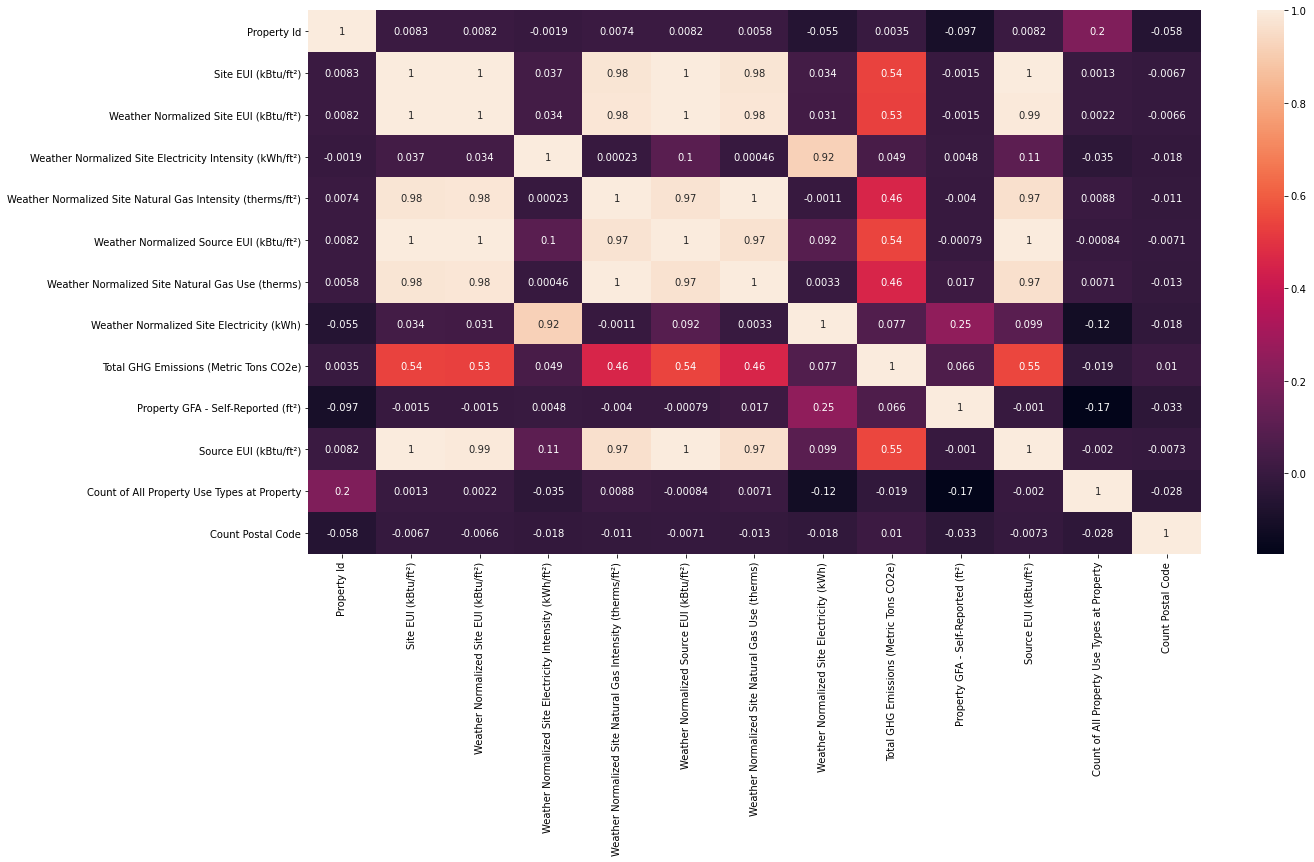

In [147]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [148]:
#df.drop(['Postal Code'],axis=1,inplace=True)

## Converting data type from object to float

In [149]:
my_dict={'Year Built':'float','ENERGY STAR Score':'float','Tax Block':'float','Tax Lot':'float','Borough':'float'}
df = df.astype(my_dict)
print(df.dtypes)

Property Id                                                   float64
Year Built                                                    float64
ENERGY STAR Score                                             float64
Site EUI (kBtu/ft²)                                           float64
Weather Normalized Site EUI (kBtu/ft²)                        float64
Weather Normalized Site Electricity Intensity (kWh/ft²)       float64
Weather Normalized Site Natural Gas Intensity (therms/ft²)    float64
Weather Normalized Source EUI (kBtu/ft²)                      float64
Weather Normalized Site Natural Gas Use (therms)              float64
Weather Normalized Site Electricity (kWh)                     float64
Total GHG Emissions (Metric Tons CO2e)                        float64
Property GFA - Self-Reported (ft²)                            float64
Source EUI (kBtu/ft²)                                         float64
Borough                                                       float64
Tax Block           

In [150]:
df

,Property Id,Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Weather Normalized Site Natural Gas Use (therms),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Borough,Tax Block,Tax Lot,Count of All Property Use Types at Property,Count Postal Code
1,28400.0,1969.0,55.0,229.8,228.8,24.8,2.4,401.1,9330734.4,96261312.1,55870.4,3889181.0,404.3,1.0,2138.0,40.0,38,110
5,28402.0,1932.0,55.0,359.9,359.0,8.3,4.8,411.5,14322508.8,24550859.4,54429.8,2971874.0,414.2,1.0,1480.0,1.0,38,144
12,2637863.0,1903.0,93.0,32.0,0.0,7.5,0.0,0.0,20472.0,3249755.2,1194.0,432503.0,87.9,3.0,232.0,1.0,34,126
13,5871253.0,1903.0,1.0,295.4,316.8,5.8,3.0,374.2,512710.7,1004824.0,2846.8,172656.0,352.2,3.0,238.0,35.0,71,126
14,2777235.0,1950.0,80.0,352.7,0.0,32.2,2.2,0.0,1255514.1,18295844.6,13302.6,567517.0,599.5,5.0,3355.0,32.0,38,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,4940453.0,1928.0,98.0,81.4,87.0,3.3,0.8,114.9,56168.9,245251.1,354.7,74177.0,109.6,3.0,238.0,26.0,6022,97
11742,4940416.0,1926.0,16.0,109.3,117.7,5.3,0.9,160.8,95350.0,532672.7,674.6,101291.0,153.4,3.0,264.0,17.0,171,126
11743,4628296.0,1913.0,83.0,44.3,43.9,7.7,0.2,101.0,18131.0,796837.2,355.2,103328.0,103.6,3.0,987.0,1.0,6022,32
11744,4940464.0,1928.0,92.0,70.0,74.9,2.6,0.7,96.9,40162.6,155319.3,247.8,60715.0,92.7,3.0,1072.0,40.0,6022,32


In [151]:
df.dtypes

Property Id                                                   float64
Year Built                                                    float64
ENERGY STAR Score                                             float64
Site EUI (kBtu/ft²)                                           float64
Weather Normalized Site EUI (kBtu/ft²)                        float64
Weather Normalized Site Electricity Intensity (kWh/ft²)       float64
Weather Normalized Site Natural Gas Intensity (therms/ft²)    float64
Weather Normalized Source EUI (kBtu/ft²)                      float64
Weather Normalized Site Natural Gas Use (therms)              float64
Weather Normalized Site Electricity (kWh)                     float64
Total GHG Emissions (Metric Tons CO2e)                        float64
Property GFA - Self-Reported (ft²)                            float64
Source EUI (kBtu/ft²)                                         float64
Borough                                                       float64
Tax Block           

In [152]:
df.isna().sum()

Property Id                                                   0
Year Built                                                    0
ENERGY STAR Score                                             0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site EUI (kBtu/ft²)                        0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0
Weather Normalized Source EUI (kBtu/ft²)                      0
Weather Normalized Site Natural Gas Use (therms)              0
Weather Normalized Site Electricity (kWh)                     0
Total GHG Emissions (Metric Tons CO2e)                        0
Property GFA - Self-Reported (ft²)                            0
Source EUI (kBtu/ft²)                                         0
Borough                                                       2
Tax Block                                                     2
Tax Lot                                 

In [153]:
df.dropna(inplace=True)

In [154]:
y=df['ENERGY STAR Score']
x=df.drop(['ENERGY STAR Score'],axis=1)
x

,Property Id,Year Built,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Weather Normalized Site Natural Gas Use (therms),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Borough,Tax Block,Tax Lot,Count of All Property Use Types at Property,Count Postal Code
1,28400.0,1969.0,229.8,228.8,24.8,2.4,401.1,9330734.4,96261312.1,55870.4,3889181.0,404.3,1.0,2138.0,40.0,38,110
5,28402.0,1932.0,359.9,359.0,8.3,4.8,411.5,14322508.8,24550859.4,54429.8,2971874.0,414.2,1.0,1480.0,1.0,38,144
12,2637863.0,1903.0,32.0,0.0,7.5,0.0,0.0,20472.0,3249755.2,1194.0,432503.0,87.9,3.0,232.0,1.0,34,126
13,5871253.0,1903.0,295.4,316.8,5.8,3.0,374.2,512710.7,1004824.0,2846.8,172656.0,352.2,3.0,238.0,35.0,71,126
14,2777235.0,1950.0,352.7,0.0,32.2,2.2,0.0,1255514.1,18295844.6,13302.6,567517.0,599.5,5.0,3355.0,32.0,38,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,4940453.0,1928.0,81.4,87.0,3.3,0.8,114.9,56168.9,245251.1,354.7,74177.0,109.6,3.0,238.0,26.0,6022,97
11742,4940416.0,1926.0,109.3,117.7,5.3,0.9,160.8,95350.0,532672.7,674.6,101291.0,153.4,3.0,264.0,17.0,171,126
11743,4628296.0,1913.0,44.3,43.9,7.7,0.2,101.0,18131.0,796837.2,355.2,103328.0,103.6,3.0,987.0,1.0,6022,32
11744,4940464.0,1928.0,70.0,74.9,2.6,0.7,96.9,40162.6,155319.3,247.8,60715.0,92.7,3.0,1072.0,40.0,6022,32


## Normalization as values are  on dfferent scale

In [155]:
for column in x.columns:
    x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min())    
  

x

,Property Id,Year Built,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Weather Normalized Site Natural Gas Use (therms),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Borough,Tax Block,Tax Lot,Count of All Property Use Types at Property,Count Postal Code
1,0.003515,0.880668,0.000264,0.000244,0.004675,0.000256,0.000407,0.017458,0.194143,0.011727,0.273550,0.000443,0.0,0.131645,0.004286,0.006145,0.475983
5,0.003516,0.792363,0.000414,0.000382,0.001565,0.000511,0.000417,0.026798,0.049515,0.011424,0.209028,0.000454,0.0,0.091111,0.000000,0.006145,0.624454
12,0.439592,0.723150,0.000037,0.000000,0.001414,0.000000,0.000000,0.000038,0.006554,0.000251,0.030413,0.000096,0.5,0.014230,0.000000,0.005481,0.545852
13,0.979936,0.723150,0.000340,0.000337,0.001093,0.000319,0.000379,0.000959,0.002027,0.000598,0.012136,0.000386,0.5,0.014600,0.003737,0.011626,0.545852
14,0.462883,0.835322,0.000406,0.000000,0.006070,0.000234,0.000000,0.002349,0.036900,0.002792,0.039910,0.000657,1.0,0.206616,0.003407,0.006145,0.043668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,0.824387,0.782816,0.000094,0.000093,0.000622,0.000085,0.000116,0.000105,0.000495,0.000074,0.005209,0.000120,0.5,0.014600,0.002748,1.000000,0.419214
11742,0.824381,0.778043,0.000126,0.000125,0.000999,0.000096,0.000163,0.000178,0.001074,0.000142,0.007116,0.000168,0.5,0.016202,0.001758,0.028235,0.545852
11743,0.772221,0.747017,0.000051,0.000047,0.001452,0.000021,0.000102,0.000034,0.001607,0.000075,0.007259,0.000113,0.5,0.060740,0.000000,1.000000,0.135371
11744,0.824389,0.782816,0.000081,0.000080,0.000490,0.000075,0.000098,0.000075,0.000313,0.000052,0.004262,0.000102,0.5,0.065977,0.004286,1.000000,0.135371


## Train-Test Split

In [156]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=135)

In [157]:
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor

## DecisionTree Regressor

In [158]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred[0:5]

array([ 83.,   1.,  17.,  94., 100.])

In [159]:
y_test[0:5]

9029    75.0
6885     1.0
5908    30.0
1199    83.0
9351    95.0
Name: ENERGY STAR Score, dtype: float64

In [160]:
from sklearn.metrics import *


In [161]:
print('mean absolute erro is ',mean_absolute_error(y_test,y_pred))

mean absolute erro is  13.820020746887966


## RandomForest Regressor

In [162]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [163]:
print('mean absolute erro is ',mean_absolute_error(y_test,y_pred_rf))

mean absolute erro is  10.287821576763484


In [164]:
y_pred_rf_train=rf.predict(x_train)

In [165]:
print('mean absolute erro is ',mean_absolute_error(y_train,y_pred_rf_train))

mean absolute erro is  3.7717116182572616


## GradiantBoosting Regressor

In [166]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)

In [167]:
print('mean absolute erro is ',mean_absolute_error(y_test,y_pred_gb))

mean absolute erro is  10.708012626527635


## Adaboost Regressor

In [168]:
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)

In [169]:
print('mean absolute erro is ',mean_absolute_error(y_test,y_pred_ab))

mean absolute erro is  15.612058414918787


In [170]:
r2_score(y_test,y_pred_rf)

0.753228904486176

In [171]:
pip install xgboost

In [172]:
from xgboost import XGBRegressor


In [173]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)

In [174]:
print('mean absolute erro is ',mean_absolute_error(y_test,y_pred_xgb))

mean absolute erro is  10.229186620335268


In [175]:
print('mean absolute erro is ',mean_absolute_error(y_train,xgb.predict(x_train)))

mean absolute erro is  3.701693810945065


## Hyperparameter tunning for Random forest

In [176]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [177]:
n_estimators = [5,20,50,100]
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 50, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [178]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [179]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


In [180]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 13, 17, 20, 24, 28,
                                                      31, 35, 39, 42, 46, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [181]:
print ('Random grid: ', random_grid, '\n')

print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 13, 17, 20, 24, 28, 31, 35, 39, 42, 46, 50], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}  



In [182]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 4, max_features = 'auto', max_depth= 20/
                               , bootstrap=True) 
randmf.fit( x_train, y_train) 

RandomForestRegressor(max_depth=24, min_samples_leaf=4, min_samples_split=10)

In [187]:
y_pred_ran=randmf.predict(x_test)

In [188]:
print('mean absolute erro is ',mean_absolute_error(y_test,y_pred_ran))

mean absolute erro is  10.207952525805789


In [189]:
print('mean absolute erro is ',mean_absolute_error(y_train,randmf.predict(x_train)))

mean absolute erro is  5.976683011920148


In [190]:
df_pred=pd.DataFrame({'Actual':y_test,'Pred':y_pred_ran})
df_pred

,Actual,Pred
9029,75.0,82.893852
6885,1.0,4.310281
5908,30.0,34.113024
1199,83.0,78.830745
9351,95.0,97.961756
...,...,...
4900,89.0,61.793481
6798,100.0,16.885681
5641,20.0,25.830556
8753,83.0,84.847442
